[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rsarka34/NPTEL-ML-DL-NOC24EE146/blob/main/SVM.ipynb)

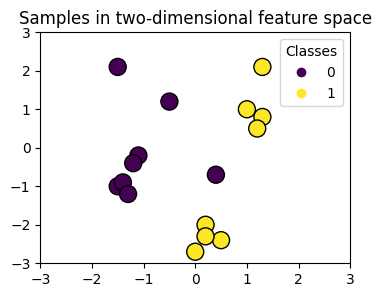

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array(
    [
        [0.4, -0.7],
        [-1.5, -1.0],
        [-1.4, -0.9],
        [-1.3, -1.2],
        [-1.1, -0.2],
        [-1.2, -0.4],
        [-0.5, 1.2],
        [-1.5, 2.1],
        [1.0, 1.0],
        [1.3, 0.8],
        [1.2, 0.5],
        [0.2, -2.0],
        [0.5, -2.4],
        [0.2, -2.3],
        [0.0, -2.7],
        [1.3, 2.1],
    ]
)

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# Plotting settings
fig, ax = plt.subplots(figsize=(4, 3))
x_min, x_max, y_min, y_max = -3, 3, -3, 3
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

# Plot samples by color and add legend
scatter = ax.scatter(X[:, 0], X[:, 1], s=150, c=y, label=y, edgecolors="k")
ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.set_title("Samples in two-dimensional feature space")
_ = plt.show()

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

# **Linear kernel**
Linear kernel is the dot product of the input samples:
\begin{equation}
K(x_1, x_2)= x_1^T\cdot x_2
\end{equation}
It is then applied to any combination of two data points (samples) in the dataset. The dot product of the two points determines the cosine_similarity between both points. The higher the value, the more similar the points are.

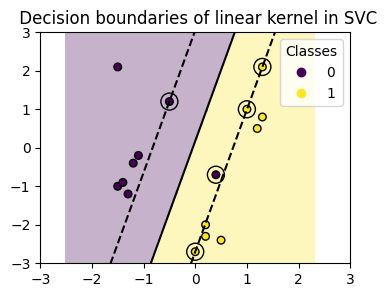

In [ ]:
plot_training_data_with_decision_boundary("linear")

# **Polynomial kernel**
The polynomial kernel changes the notion of similarity. The kernel function is defined as:
\begin{equation}
K(x_1, x_2)= (\gamma\cdot x_1^T\cdot x_2 + r)^d
\end{equation}

where
 is the degree (degree) of the polynomial,
 (gamma) controls the influence of each individual training sample on the decision boundary and
 is the bias term (coef0) that shifts the data up or down. Here, we use the default value for the degree of the polynomial in the kernel function (degree=3). When coef0=0 (the default), the data is only transformed, but no additional dimension is added. Using a polynomial kernel is equivalent to creating PolynomialFeatures and then fitting a SVC with a linear kernel on the transformed data, although this alternative approach would be computationally expensive for most datasets.



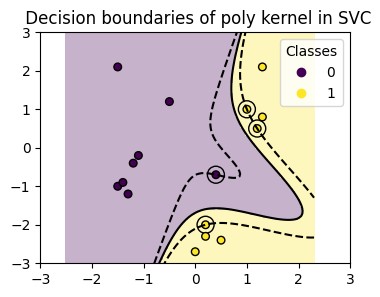

In [ ]:
plot_training_data_with_decision_boundary("poly")

# **RBF kernel**
The radial basis function (RBF) kernel, also known as the Gaussian kernel, is the default kernel for Support Vector Machines in scikit-learn. It measures similarity between two data points in infinite dimensions and then approaches classification by majority vote. The kernel function is defined as:
\begin{equation}
K(x_1, x_2)= exp(-\gamma\cdot||x_1- x_2||)^2
\end{equation}
where
 $\gamma$(gamma) controls the influence of each individual training sample on the decision boundary.

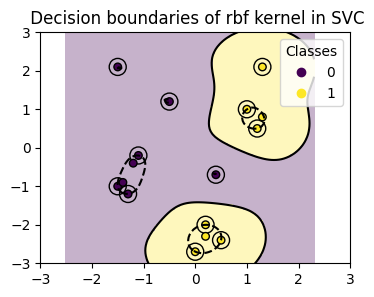

In [ ]:
plot_training_data_with_decision_boundary("rbf")

# **XOR dataset**
A classical example of a dataset which is not linearly separable is the XOR pattern. HEre we demonstrate how different kernels work on such a dataset.

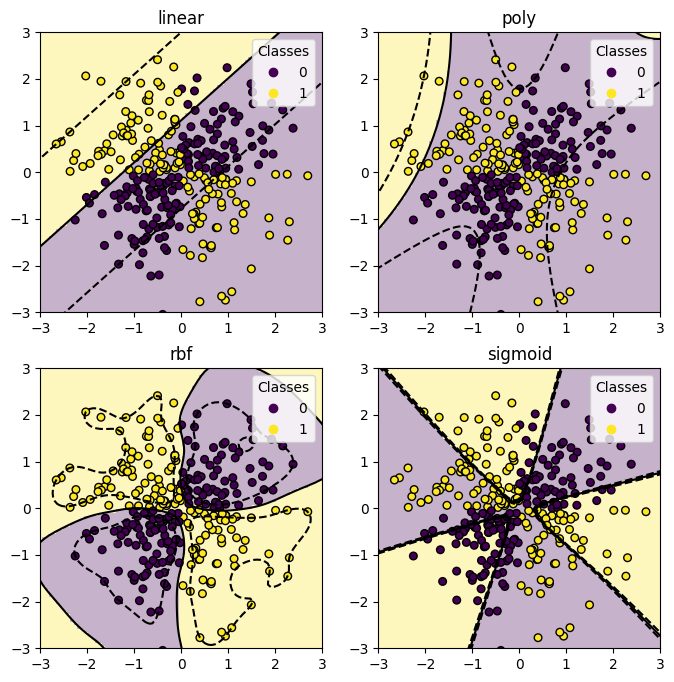

In [ ]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

_, ax = plt.subplots(2, 2, figsize=(8, 8))
args = dict(long_title=False, support_vectors=False)
plot_training_data_with_decision_boundary("linear", ax[0, 0], **args)
plot_training_data_with_decision_boundary("poly", ax[0, 1], **args)
plot_training_data_with_decision_boundary("rbf", ax[1, 0], **args)
plot_training_data_with_decision_boundary("sigmoid", ax[1, 1], **args)
plt.show()

# **Plot different SVM classifiers in the iris dataset**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


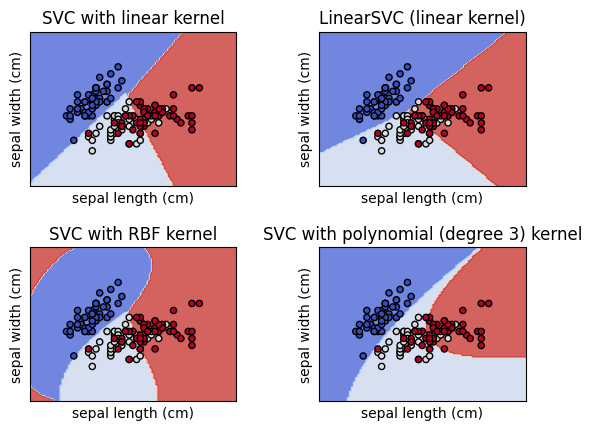

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# **Classify MNIST**

Test Accuracy: 0.53


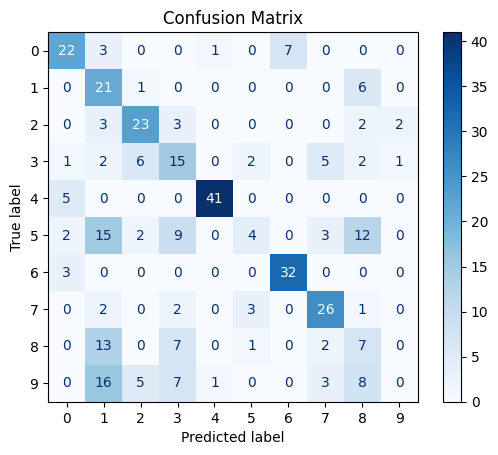

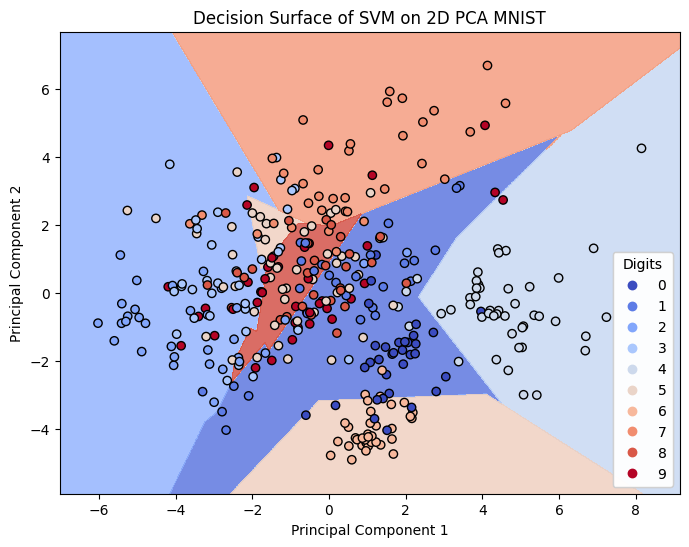

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the MNIST dataset
digits = datasets.load_digits()

# Flatten the images, normalize the data
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use PCA to reduce dimensionality to 2D for visualization purposes
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the SVM classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train_pca, y_train)

# Predict the test set
y_pred = svm_clf.predict(X_test_pca)

# Calculate and print the test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot the decision surface with legends
plt.figure(figsize=(8, 6))
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Plot data points and add legends
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
legend1 = plt.legend(*scatter.legend_elements(), title="Digits")
plt.gca().add_artist(legend1)

plt.title('Decision Surface of SVM on 2D PCA MNIST')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
